In [1]:
import seaborn as sns

In [16]:
iris = sns.load_dataset('iris')

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# learning curve
from sklearn.model_selection import learning_curve
# data size, epochs

### No Free Lunch Theorem (공짜 점심 없음 정리)

## Garbage in, Garbage out
- 대표성이 부족한 데이터를 충분성을 위해 더 넣어주게 되면 쓰레기 데이터가 됨.
- 해결책 : 데이터 전처리

+대표성 검증 방법 : 가설 검증

**Data leakage**
- x, y 간에 상관관계가 명확히 있으면 정확한 모델을 만들 수 없다.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
iris.shape

(150, 5)

In [28]:
iris.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species)

In [21]:
# 설치는 -, 사용은 _
#!pip install -U sklearn-evaluation

In [10]:
import sklearn_evaluation

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

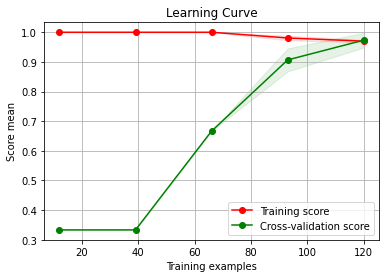

In [34]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)


### Holdout 교차 검증
- prediction (예측) 과거 -> 미래
- diagnosis (진단) 

In [22]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt.fit(iris.iloc[:,:-1],iris.species)

DecisionTreeClassifier()

In [47]:
dt.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

In [ ]:
sns.heatmap(iris.corr(), annot=True)

In [43]:
from sklearn.feature_selection import SelectKBest, chi2

In [44]:
skb = SelectKBest(chi2, k=3)

In [45]:
skb.fit(iris.iloc[:,:-1],iris.species)

SelectKBest(k=3, score_func=<function chi2 at 0x000002C6E34DE670>)

In [46]:
vars(skb)

{'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'k': 3,
 'n_features_in_': 4,
 'scores_': array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 'pvalues_': array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])}

내가 가진 데이터는 정답 데이터로 가정

모델 (train) / 테스트 (test) : 성능 측정 / 검증

학습한 데이터 > 검증 > optimistic bias 발생 ( 검증 정확도 떨어짐 ) : 한 번 본 시험 다시 보는 것과 같음

-> 테스트 데이터를 쪼갬

stratify, shuffle 사용해서 Data Shift 문제 발생하지 않도록 해야 함.

테스트 데이터의 갯수가 적으면 편차(variance)가 심하므로 신뢰성 문제 발생.

### Imbalanced data issue
정상 999999 비정상 1  -> 정확도 : 99.9999

- 3-way holdout
train validation test set : Hyperparameter 조정에 사용

Hyperparameter 찾았으면 **데이터 전부 다시 합쳐서** train 시키고 최종 모델 찾음.

In [ ]:
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV